In [0]:
import keras 
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Dense, Dropout,Flatten,Activation,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,AveragePooling2D
from keras.initializers import he_normal 
from keras import optimizers 
from keras.callbacks import LearningRateScheduler,TensorBoard
from keras.layers.normalization import BatchNormalization 
from keras.utils.data_utils import get_file 
import matplotlib.pyplot as plt 

In [0]:
num_classes = 10
batch_size = 128
epochs = 100
iterations = 391 
dropout = 0.5 
weight_decay = 0.0001 

from keras import backend as K 
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session 
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True 
    sess = tf.Session(config=config)
    
def scheduler(epoch):
    if epoch<80:
        return 0.1
    if epoch < 160:
        return 0.01
    return 0.001 




In [0]:
#Data Preparation 
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train[:,:,:,0] = (X_train[:,:,:,0]-123.680)
X_train[:,:,:,1] = (X_train[:,:,:,1]-116.779)
X_train[:,:,:,2] = (X_train[:,:,:,2]-103.939)
X_test[:,:,:,0] = (X_test[:,:,:,0]-123.680)
X_test[:,:,:,1] = (X_test[:,:,:,1]-116.779)
X_test[:,:,:,2] = (X_test[:,:,:,2]-103.939)






In [0]:
X_train.shape[1:]

(32, 32, 3)

In [0]:
#Build Model 
model = Sequential()
#Block1 
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal(),
                input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block2
model.add(Conv2D(128,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()
                ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block3 
model.add(Conv2D(256,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


#Block4 

model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block5 
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same',
                kernel_regularizer=keras.regularizers.l2(weight_decay),
                kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Final Stage 
model.add(Flatten())
model.add(Dense(4096,use_bias = True, kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(4096,kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(10,kernel_regularizer=keras.regularizers.l2(weight_decay), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')

model.load_weights(filepath, by_name=True)

#Optimizer setting 
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,
             metrics=['accuracy'])
datagen = ImageDataGenerator(horizontal_flip=True,
                            width_shift_range=0.125,
                            height_shift_range=0.125,
                            fill_mode='constant',
                            cval=0.)
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, y_train,batch_size=128),
         epochs = 100,
         steps_per_epoch = 500,
         validation_data=(X_test,y_test),
         verbose=1)







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_172 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_172 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_173 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_173 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 64)        0         
__________

In [0]:
# Functions for plots
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

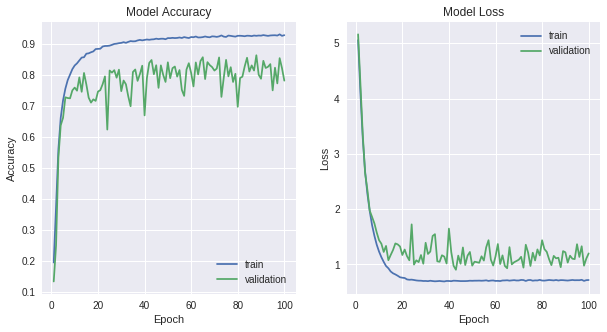

In [33]:
plot_model_history(model.history)